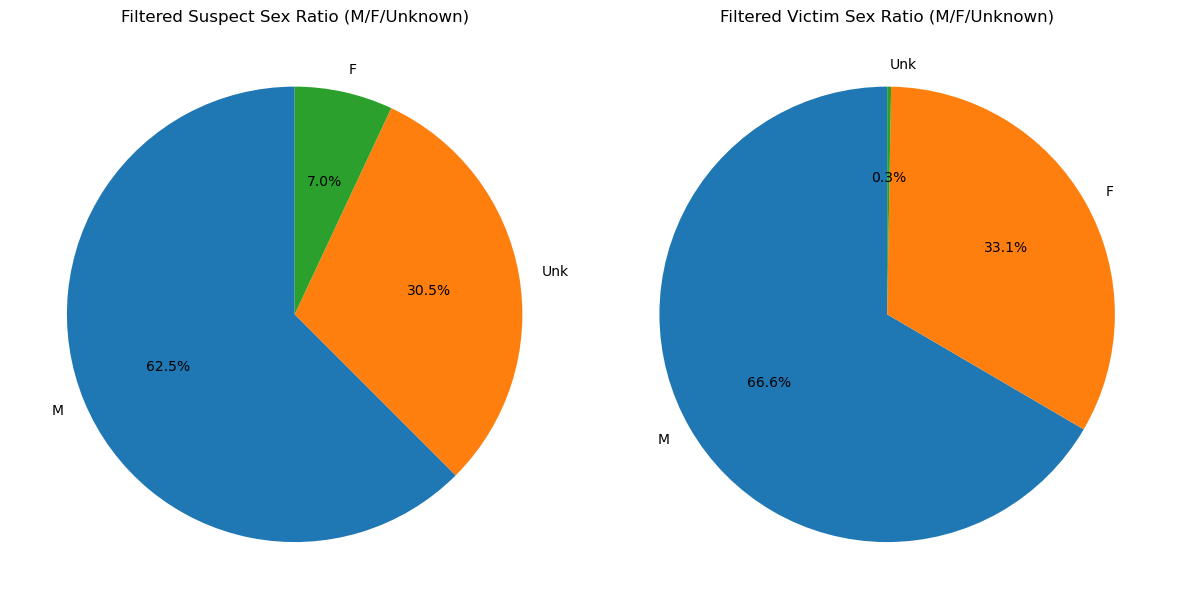

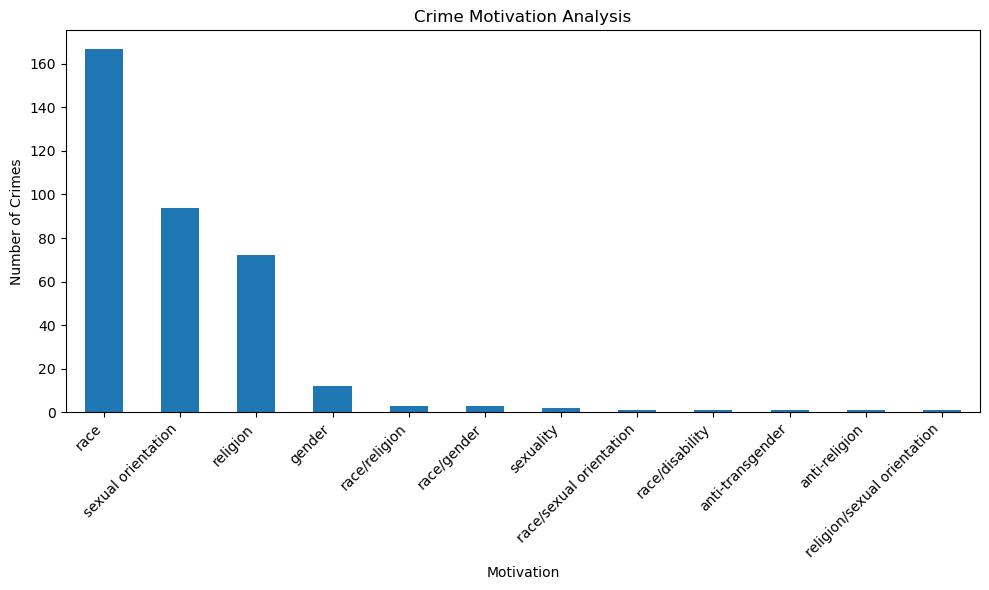

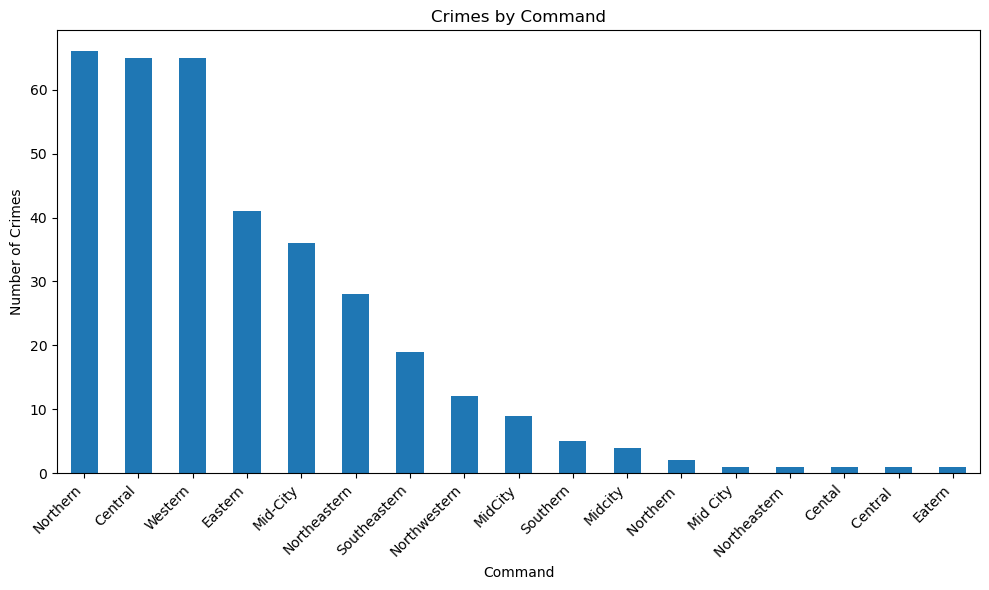

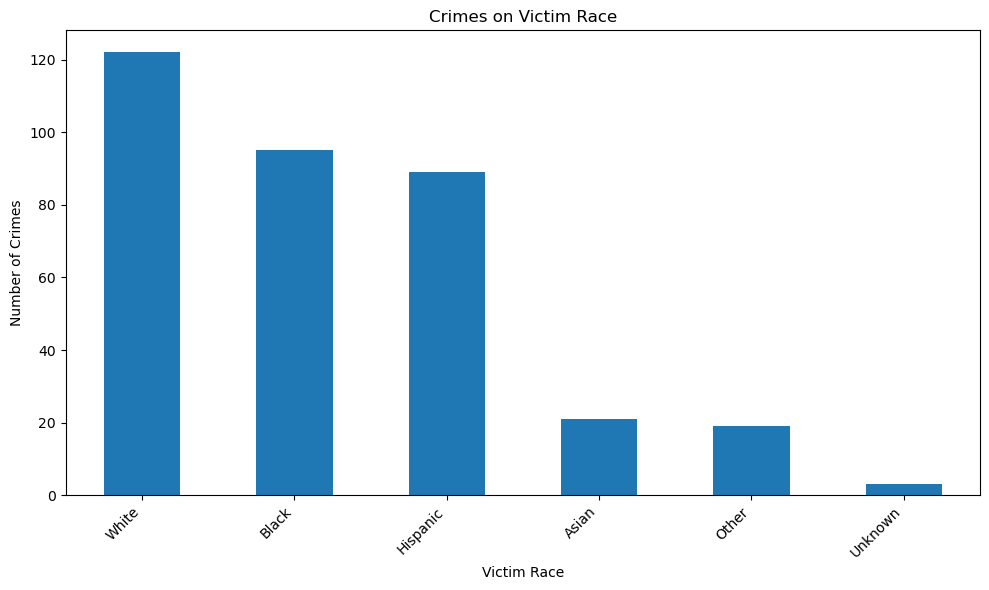

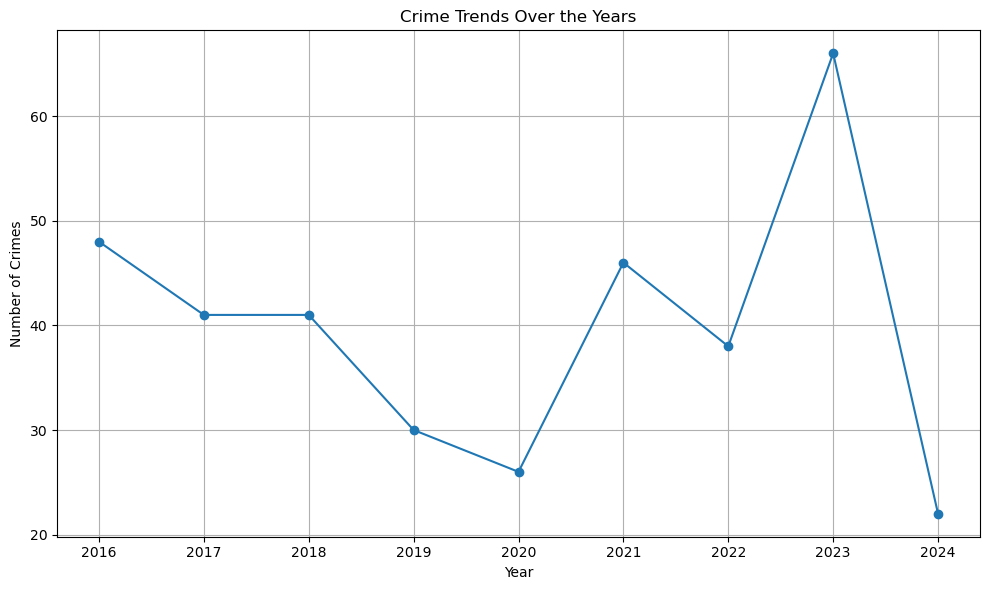

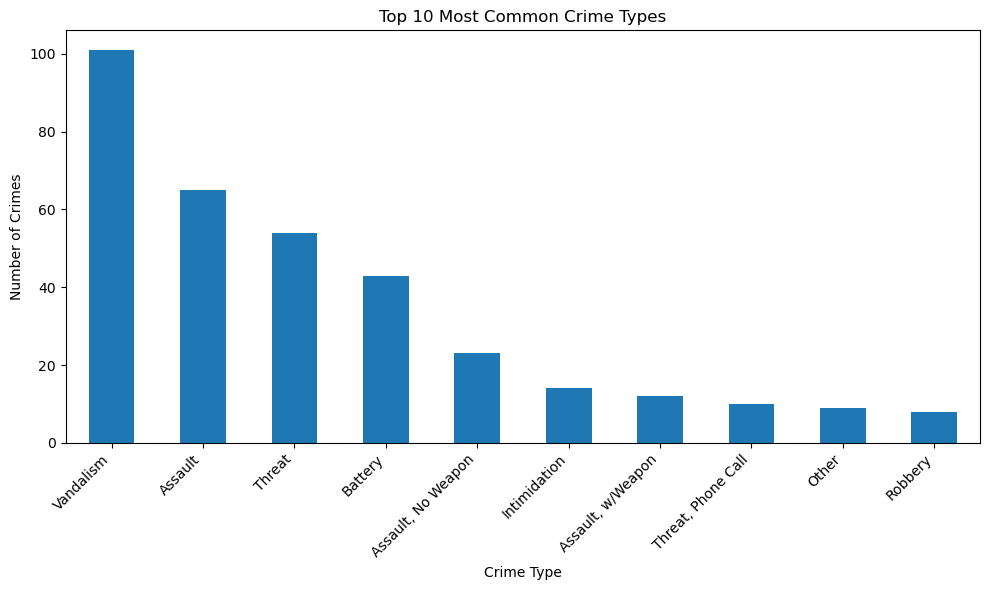

/tmp/ipykernel_96427/2624865517.py:120: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'], errors='coerce').dt.hour


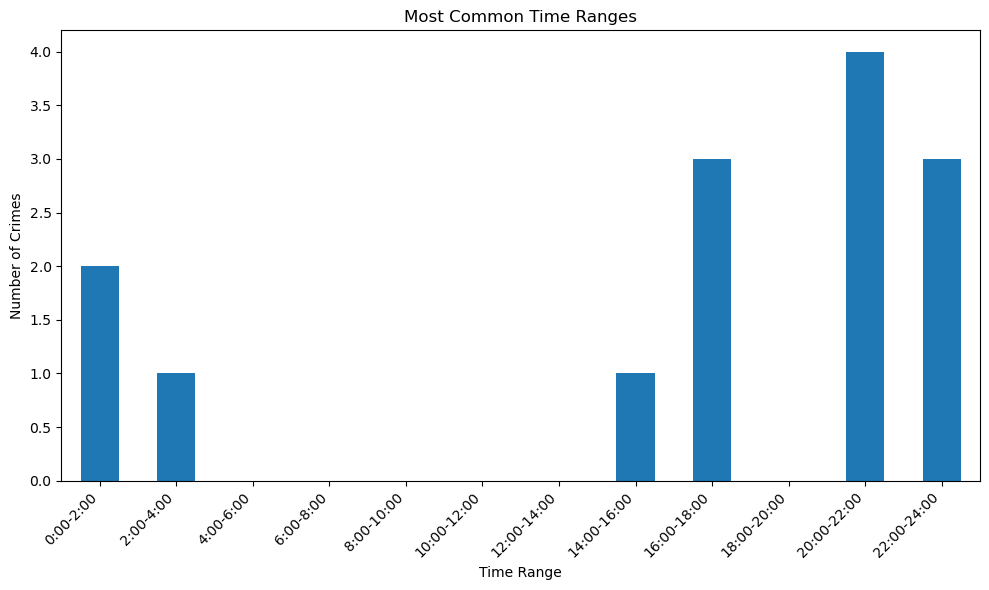

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/home/jovyan/git/docker/ETL_DATA/hate_crimes_datasd.csv") 

# Analyze the male-to-female ratio for suspects
suspect_sex_columns = ['suspect_sex_0', 'suspect_sex_1', 'suspect_sex_2', 'suspect_sex_3']
suspect_sex_data = data[suspect_sex_columns].stack().value_counts()

# Analyze the male-to-female ratio for victims
victim_sex_columns = ['victim_sex_0', 'victim_sex_1', 'victim_sex_2', 'victim_sex_3']
victim_sex_data = data[victim_sex_columns].stack().value_counts()

# Filter suspect data
filtered_suspect_sex_data = suspect_sex_data[suspect_sex_data.index.isin(['M', 'F', 'Unk'])].reset_index()
filtered_suspect_sex_data.columns = ['Sex', 'Count']

# Filter victim data
filtered_victim_sex_data = victim_sex_data[victim_sex_data.index.isin(['M', 'F', 'Unk'])].reset_index()
filtered_victim_sex_data.columns = ['Sex', 'Count']

# Plotting the filtered data as pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for suspect sex ratio
axs[0].pie(filtered_suspect_sex_data['Count'], labels=filtered_suspect_sex_data['Sex'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Filtered Suspect Sex Ratio (M/F/Unknown)')

# Pie chart for victim sex ratio
axs[1].pie(filtered_victim_sex_data['Count'], labels=filtered_victim_sex_data['Sex'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Filtered Victim Sex Ratio (M/F/Unknown)')

# Display the pie charts
plt.tight_layout()
plt.show()

# Analyze motivation frequencies
# Remove potential duplicates based on case insensitivity and leading/trailing spaces
unique_motivation_data = data['motivation'].str.strip().str.lower().drop_duplicates()

# Count occurrences of unique motivations
motivation_data_cleaned = data['motivation'].str.strip().str.lower().value_counts()

# Plotting the motivation data
plt.figure(figsize=(10, 6))
motivation_data_cleaned.plot(kind='bar')
plt.title('Crime Motivation Analysis')
plt.xlabel('Motivation')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze crime rates by command
command_data = data['command'].value_counts()

# Plotting the command data
plt.figure(figsize=(10, 6))
command_data.plot(kind='bar')
plt.title('Crimes by Command')
plt.xlabel('Command')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Define the valid races
valid_races = ['a', 'b', 'h', 'w', 'o', 'unk']

# Clean victim race data by keeping only the specified valid race categories
victim_race_cleaned = data[victim_race_columns].stack().str.strip().str.lower().value_counts()
victim_race_cleaned_filtered = victim_race_cleaned[victim_race_cleaned.index.isin(valid_races)]

# Plotting the cleaned and filtered victim race data without colors and with the legend
plt.figure(figsize=(10, 6))
victim_race_cleaned_filtered.plot(kind='bar') 
race_labels = {
    'a': 'Asian',
    'b': 'Black',
    'h': 'Hispanic',
    'w': 'White',
    'o': 'Other',
    'unk': 'Unknown'}

plt.title('Crimes on Victim Race')
plt.xlabel('Victim Race')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(len(victim_race_cleaned_filtered)), labels=[race_labels[race] for race in victim_race_cleaned_filtered.index], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze the crime trends over the years
crime_by_year = data['year'].value_counts().sort_index()

# Plotting the crime trends over the years
plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o')
plt.title('Crime Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze the most common crime types
crime_type_data = data['crime'].value_counts().head(10)

# Plotting the most common crime types
plt.figure(figsize=(10, 6))
crime_type_data.plot(kind='bar')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Convert the 'time' column to a datetime format to extract the hour of the day
data['time'] = pd.to_datetime(data['time'], errors='coerce').dt.hour

# Grouping crime data into 2-hour ranges
data['time_range'] = pd.cut(data['time'], bins=range(0, 25, 2), right=False, labels=[f'{i}:00-{i+2}:00' for i in range(0, 24, 2)])

# Analyze the frequency of crimes by 2-hour time range
crime_by_time_range = data['time_range'].value_counts().sort_index()

# Plotting the crime frequency by 2-hour time range
plt.figure(figsize=(10, 6))
crime_by_time_range.plot(kind='bar')
plt.title('Most Common Time Ranges')
plt.xlabel('Time Range')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
